# Data Preprocessing

In [892]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [893]:
data = pd.read_csv("baseball.csv")
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403


In [894]:
data.shape

(1232, 15)

In [895]:
data["Year"].unique()

array([2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1971, 1970, 1969, 1968, 1967, 1966, 1965,
       1964, 1963, 1962])

In [896]:
print(sorted(list(data["Team"].unique())))

['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCA', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'MLN', 'MON', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SEP', 'SFG', 'STL', 'TBD', 'TBR', 'TEX', 'TOR', 'WSA', 'WSN']


In [897]:
data.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [898]:
# drop RankSeason & RankPlayoffs columns
data = data.drop(data.iloc[:,10:12],axis=1)
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403


In [899]:
# impute missing data
icols = list(data.iloc[:,3:9].columns)
jcols = ["OOBP","OSLG"]

In [900]:
# create dataframe with non-NaN data that is relevant to columns with NaN data
df1 = data[icols]
df1.head(3)

,RS,RA,W,OBP,SLG,BA
0,734,688,81,0.328,0.418,0.259
1,700,600,94,0.320,0.389,0.247
2,712,705,93,0.311,0.417,0.247


In [901]:
# create dataframe with columns containing NaN values
df2 = data[jcols]
df2.head(3)

,OOBP,OSLG
0,0.317,0.415
1,0.306,0.378
2,0.315,0.403


In [902]:
# combine the two dataframes
df3 = pd.concat([df1,df2],axis=1)
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [903]:
# create new dataframe with non-NaN data
notnans = df3[jcols].notnull().all(axis=1)
df_notnans = df3[notnans]
df_notnans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [904]:
# split df_notnans into train & test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_notnans[icols],df_notnans[jcols],test_size=0.25,random_state=4)

In [905]:
# use Linear Regression model to predict NaN values
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

regr_multirf = MultiOutputRegressor(LinearRegression())
regr_multirf.fit(X_train,y_train)
score = regr_multirf.score(X_test,y_test)
print("Prediction score: ",score)

Prediction score:  0.8230651180905753


In [906]:
# create a copy df of df3 with NaNs data
df_nans = df3.loc[~notnans].copy()
df_nans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
420,787,783,85,0.335,0.415,0.272,NaN,NaN
421,665,812,65,0.314,0.393,0.246,NaN,NaN
422,826,581,106,0.342,0.453,0.272,NaN,NaN


In [907]:
# predict NaN data
df_nans[jcols] = regr_multirf.predict(df_nans[icols])
df_nans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
420,787,783,85,0.335,0.415,0.272,0.335032,0.426231
421,665,812,65,0.314,0.393,0.246,0.341356,0.434208
422,826,581,106,0.342,0.453,0.272,0.302802,0.369844


In [908]:
# apply prediction to df3
df3 = df3.fillna(df_nans[jcols])
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [909]:
# check df3 for NaN values
df3.isnull().sum()

RS      0
RA      0
W       0
OBP     0
SLG     0
BA      0
OOBP    0
OSLG    0
dtype: int64

In [910]:
# add Year and Team columns from original dataframe
df3["Year"] = data["Year"]
df3["Team"] = data["Team"]
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team
0,734,688,81,0.328,0.418,0.259,0.317,0.415,2012,ARI
1,700,600,94,0.320,0.389,0.247,0.306,0.378,2012,ATL
2,712,705,93,0.311,0.417,0.247,0.315,0.403,2012,BAL


In [911]:
# add Run Differential for predicting wins
df3["RD"] = data["RS"] - data["RA"]
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD
0,734,688,81,0.328,0.418,0.259,0.317,0.415,2012,ARI,46
1,700,600,94,0.320,0.389,0.247,0.306,0.378,2012,ATL,100
2,712,705,93,0.311,0.417,0.247,0.315,0.403,2012,BAL,7


## Correlation Matrix

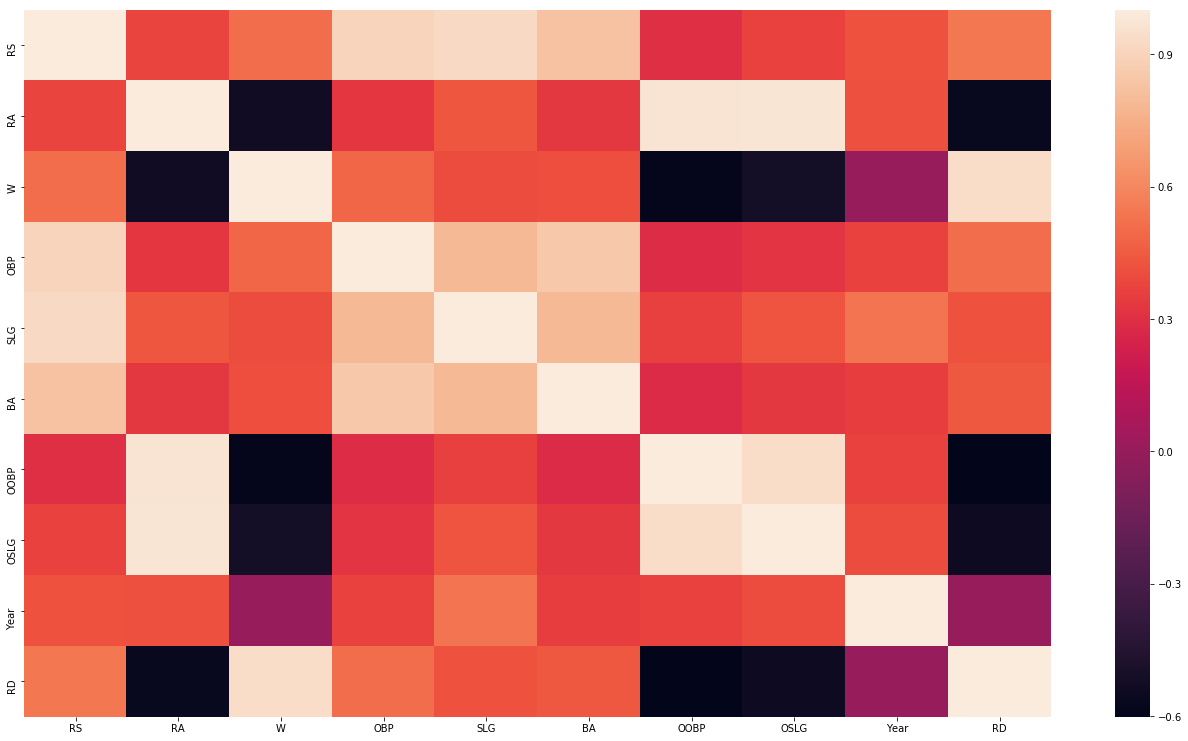

In [912]:
plt.rcParams['figure.figsize'] = (23,13)

corrmat = df3.corr()
sns.heatmap(corrmat)
plt.show()

Columns of interest for analysis with most correlated features (0.8-0.9 + range):

1. Runs Scored (RS) : OBP, SLG, BA

2. Runs Allowed (RA): OOBP, OSLG

3. Wins (W): RD

## Pairplot (data distribution & correlation visuals)

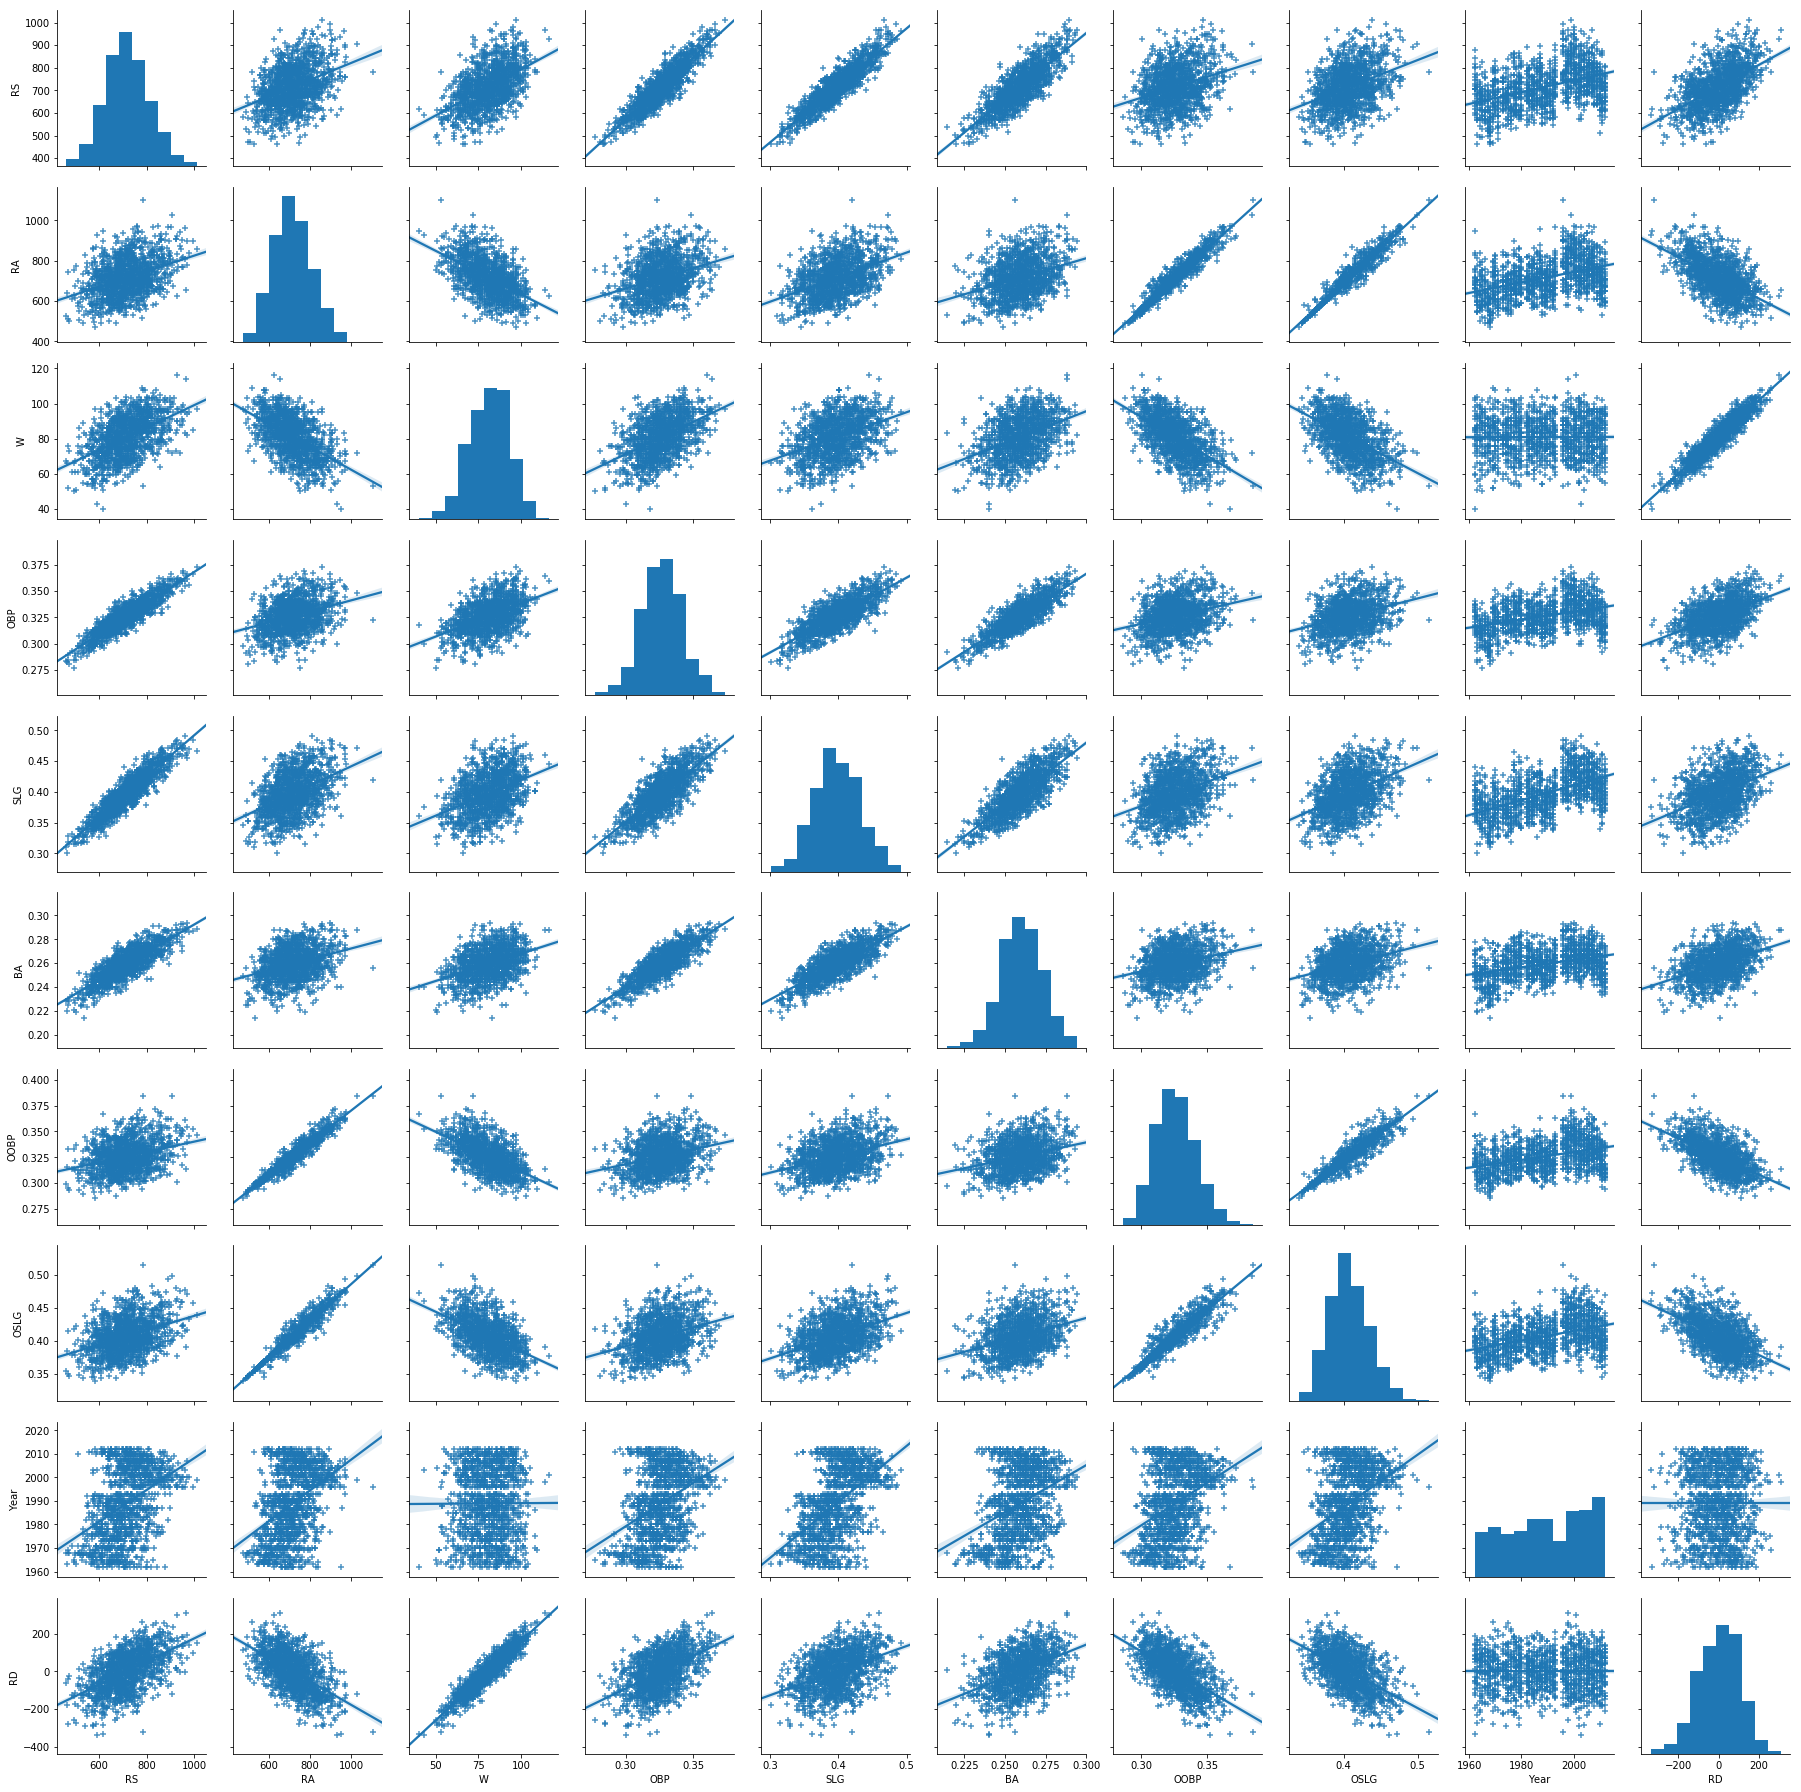

In [913]:
sns.pairplot(df3,markers="+",kind="reg")
plt.show()

Disregarding "Year" column visual, the other columns appear to contain normally distributed data.

## Create new target columns for predictions in regression model

In [914]:
df3["RS_Target"] = df3.groupby("Team")["RS"].shift(1)
df3["RA_Target"] = df3.groupby("Team")["RA"].shift(1)
df3["W_Target"] = df3.groupby("Team")["W"].shift(1)
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD,RS_Target,RA_Target,W_Target
0,734,688,81,0.328,0.418,0.259,0.317,0.415,2012,ARI,46,NaN,NaN,NaN
1,700,600,94,0.320,0.389,0.247,0.306,0.378,2012,ATL,100,NaN,NaN,NaN
2,712,705,93,0.311,0.417,0.247,0.315,0.403,2012,BAL,7,NaN,NaN,NaN


In [915]:
df3 = df3[df3["Year"]<=2002]
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD,RS_Target,RA_Target,W_Target
300,851,644,99,0.341,0.433,0.282,0.314,0.392,2002,ANA,207,736.0,743.0,77.0
301,819,674,98,0.346,0.423,0.267,0.305,0.397,2002,ARI,145,717.0,685.0,84.0
302,708,565,101,0.331,0.409,0.260,0.313,0.364,2002,ATL,143,907.0,740.0,101.0


In [916]:
# have some NaN values
df3.isnull().sum()

RS           0
RA           0
W            0
OBP          0
SLG          0
BA           0
OOBP         0
OSLG         0
Year         0
Team         0
RD           0
RS_Target    5
RA_Target    5
W_Target     5
dtype: int64

In [917]:
# five values can be removed/dropped
df3[df3.isnull().any(axis=1)]

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD,RS_Target,RA_Target,W_Target
481,762,943,70,0.339,0.431,0.276,0.361283,0.470802,1996,CAL,-181,NaN,NaN,NaN
1043,537,660,63,0.307,0.326,0.230,0.321431,0.391779,1971,WSA,-123,NaN,NaN,NaN
1088,639,799,64,0.316,0.346,0.234,0.340668,0.430016,1969,SEP,-160,NaN,NaN,NaN
1122,533,660,62,0.296,0.330,0.233,0.319956,0.392184,1967,KCA,-127,NaN,NaN,NaN
1164,708,633,86,0.310,0.416,0.256,0.310777,0.384745,1965,MLN,75,NaN,NaN,NaN


In [918]:
df3 = df3.dropna(how="any")
df3.isnull().sum()

RS           0
RA           0
W            0
OBP          0
SLG          0
BA           0
OOBP         0
OSLG         0
Year         0
Team         0
RD           0
RS_Target    0
RA_Target    0
W_Target     0
dtype: int64

In [919]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 15):
    display(df3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD,RS_Target,RA_Target,W_Target
300,851,644,99,0.341,0.433,0.282,0.314000,0.392000,2002,ANA,207,736.0,743.0,77.0
301,819,674,98,0.346,0.423,0.267,0.305000,0.397000,2002,ARI,145,717.0,685.0,84.0
302,708,565,101,0.331,0.409,0.260,0.313000,0.364000,2002,ATL,143,907.0,740.0,101.0
303,667,773,67,0.309,0.403,0.246,0.336000,0.435000,2002,BAL,-106,743.0,820.0,71.0
304,859,665,93,0.345,0.444,0.277,0.308000,0.385000,2002,BOS,194,961.0,809.0,95.0
305,706,759,67,0.321,0.413,0.246,0.331000,0.407000,2002,CHC,-53,724.0,683.0,88.0
306,856,798,81,0.338,0.449,0.268,0.330000,0.423000,2002,CHW,58,791.0,715.0,86.0
307,709,774,78,0.330,0.408,0.253,0.338000,0.426000,2002,CIN,-65,694.0,886.0,69.0
308,739,837,74,0.321,0.412,0.249,0.348000,0.423000,2002,CLE,-98,699.0,778.0,68.0
309,778,898,73,0.337,0.423,0.274,0.349000,0.466000,2002,COL,-120,853.0,892.0,74.0


## Boxplots (checking for outliers)

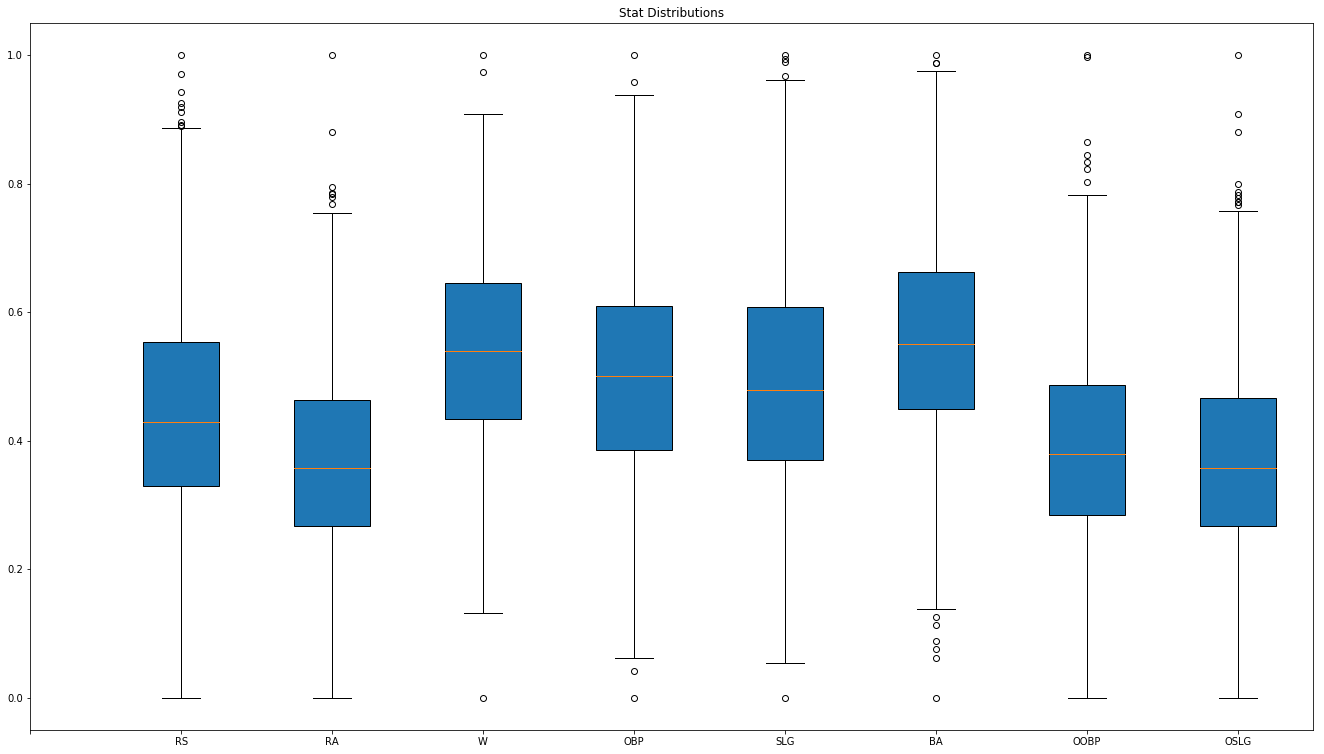

In [920]:
# normalize large data ("RS","RA","W")
# tried using sklearn normalize, got errors w/ shape (how to use this properly?)
def normalize(df):
    x = (df-df.min())/(df.max()-df.min())
    return x 

d_set1 = normalize(df3["RS"])
d_set2 = normalize(df3["RA"])
d_set3 = normalize(df3["W"])
d_set4 = normalize(df3["OBP"])
d_set5 = normalize(df3["SLG"])
d_set6 = normalize(df3["BA"])
d_set7 = normalize(df3["OOBP"])
d_set8 = normalize(df3["OSLG"])
data = [d_set1,d_set2,d_set3,d_set4,d_set5,d_set6,d_set7,d_set8]
col_names = ["","RS","RA","W","OBP","SLG","BA","OOBP","OSLG"]
y_pos = np.arange(len(col_names))
plt.boxplot(data,patch_artist=True)
plt.xticks(y_pos,col_names)
plt.title("Stat Distributions")
plt.show()

There appears to be some outliers in the dataset. May need to remove outliers to get more accurate model. 

In [921]:
# use Z-score to detect and remove outliers
#from scipy import stats

#z = np.abs(stats.zscore(df3.iloc[:,0:8]))

In [922]:
# use Z-score threshold < 3
#df3 = df3[(z<=2).all(axis=1)]

In [923]:
#df3.shape

In [924]:
#d_set1 = normalize(df3["RS"])
#d_set2 = normalize(df3["RA"])
#d_set3 = normalize(df3["W"])
#d_set4 = normalize(df3["OBP"])
#d_set5 = normalize(df3["SLG"])
#d_set6 = normalize(df3["BA"])
#d_set7 = normalize(df3["OOBP"])
#d_set8 = normalize(df3["OSLG"])
#data = [d_set1,d_set2,d_set3,d_set4,d_set5,d_set6,d_set7,d_set8]
#col_names = ["","RS","RA","W","OBP","SLG","BA","OOBP","OSLG"]
#y_pos = np.arange(len(col_names))
#plt.boxplot(data,patch_artist=True)
#plt.xticks(y_pos,col_names)
#plt.title("Stat Distributions")
#plt.show()

## Check columns after processing

In [925]:
df3["Year"].unique()

array([2002, 2001, 2000, 1999, 1998, 1997, 1996, 1993, 1992, 1991, 1990,
       1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962])

In [926]:
print(sorted(list(df3["Team"].unique())))

['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCA', 'KCR', 'LAA', 'LAD', 'MIL', 'MIN', 'MLN', 'MON', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBD', 'TEX', 'TOR', 'WSA']


Removed Miami Marlins (MIA, 2012 to present), Tampa Bay Rays (TBR, 2008 to present), Washington Nationals (WSN, 2005 to present) because focus of analysis is between 1965 to 2002. 